In [1]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer, QuantileTransformer,StandardScaler
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import warnings
from statistics import mean

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("ufc_final_dataset.csv")

numerical_col = ['age_diff',
 'height_diff',
 'weight_diff',
 'win_ratio_diff',
 'prev_win_streak_continuous_diff',
 'prev_loss_streak_continuous_diff',
 'avg_total_strike_succ_ratio_diff',
 'avg_sig_strikes_succ_ratio_diff',
 'avg_submission_ratio_diff',
 'avg_reversal_ratio_diff',
 'avg_body_strikes_succ_ratio_diff',
 'avg_leg_strikes_succ_ratio_diff',
 'avg_clinch_strikes_succ_ratio_diff']


In [4]:
df.columns

Index(['fight_round', 'event_city', 'event_state', 'f_1_gender', 'f_2_gender',
       'f_1_weight_class', 'f_2_weight_class', 'f_1_fighter_stance',
       'f_2_fighter_stance', 'f_1_prev_result', 'f_2_prev_result', 'age_diff',
       'height_diff', 'weight_diff', 'win_ratio_diff',
       'prev_win_streak_continuous_diff', 'prev_loss_streak_continuous_diff',
       'avg_total_strike_succ_ratio_diff', 'avg_sig_strikes_succ_ratio_diff',
       'avg_submission_ratio_diff', 'avg_reversal_ratio_diff',
       'avg_head_strikes_succ_ratio_diff', 'avg_body_strikes_succ_ratio_diff',
       'avg_leg_strikes_succ_ratio_diff',
       'avg_distance_strikes_succ_ratio_diff',
       'avg_clinch_strikes_succ_ratio_diff',
       'avg_ground_strikes_succ_ratio_diff', 'label'],
      dtype='object')

In [5]:
label = df['label'].tolist()

In [6]:
# getdummies

In [7]:
df= pd.concat([df,pd.get_dummies(df.fight_round,prefix = "fight_round").astype(int)],axis = 1)
df= pd.concat([df,pd.get_dummies(df.event_city,prefix = "event_city").astype(int)],axis = 1)
df= pd.concat([df,pd.get_dummies(df.event_state,prefix = "event_state").astype(int)],axis = 1)
df= pd.concat([df,pd.get_dummies(df.f_1_weight_class,prefix = "weight_class").astype(int)],axis = 1)
df= pd.concat([df,pd.get_dummies(df.f_1_fighter_stance,prefix = "fighter_1_stance").astype(int)],axis = 1)
df= pd.concat([df,pd.get_dummies(df.f_2_fighter_stance,prefix = "fighter_2_stance").astype(int)],axis = 1)
df= pd.concat([df,pd.get_dummies(df.f_1_prev_result,prefix = "f_1_prev_result").astype(int)],axis = 1)
df= pd.concat([df,pd.get_dummies(df.f_2_prev_result,prefix = "f_2_prev_result").astype(int)],axis = 1)
df['f_1_gender'] = df['f_1_gender'].replace({'M' : 0 ,'F' : 1})
df['f_2_gender'] = df['f_2_gender'].replace({'M' : 0 ,'F' : 1})
df = df.drop(columns = ['fight_round', 'event_city', 'event_state','f_1_weight_class', 'f_2_weight_class', 'f_1_fighter_stance',
       'f_2_fighter_stance', 'f_1_prev_result', 'f_2_prev_result'])



In [8]:
df

,f_1_gender,f_2_gender,age_diff,height_diff,weight_diff,win_ratio_diff,prev_win_streak_continuous_diff,prev_loss_streak_continuous_diff,avg_total_strike_succ_ratio_diff,avg_sig_strikes_succ_ratio_diff,...,f_1_prev_result_DQ,f_1_prev_result_Decision,f_1_prev_result_KO/TKO,f_1_prev_result_Submission,f_1_prev_result_TKO - Doctor's Stoppage,f_2_prev_result_DQ,f_2_prev_result_Decision,f_2_prev_result_KO/TKO,f_2_prev_result_Submission,f_2_prev_result_TKO - Doctor's Stoppage
0,0,0,-4.71,-5.08,0.0,0.666667,0,1,0.672243,0.479787,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2.66,2.54,15.0,0.333333,1,0,0.811505,0.629091,...,0,0,0,1,0,0,0,0,0,0
2,0,0,-0.97,5.08,15.0,1.000000,4,0,0.802060,0.508586,...,0,1,0,0,0,0,0,0,0,0
3,0,0,-0.89,2.54,11.0,-0.300000,0,2,0.132593,0.096305,...,0,1,0,0,0,0,1,0,0,0
4,0,0,-6.51,12.70,6.0,-0.500000,-1,0,-0.135841,-0.115306,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514,0,0,3.13,-2.54,0.0,1.000000,1,0,0.195800,0.200753,...,0,0,1,0,0,0,1,0,0,0
7515,1,1,7.03,-2.54,0.0,-0.454545,-4,-3,0.106005,0.103448,...,0,1,0,0,0,0,1,0,0,0
7516,0,0,-8.14,-5.08,0.0,0.470588,3,0,0.041523,0.012314,...,0,0,0,1,0,0,0,1,0,0
7517,0,0,-3.48,5.08,0.0,0.287500,0,1,0.042846,0.006331,...,0,1,0,0,0,0,0,0,1,0


In [9]:
var_thr = VarianceThreshold(threshold = 0.05) #Removing both constant and quasi-constant
var_thr.fit(df)

var_thr.get_support()

df = df[df.columns[var_thr.get_support(indices=True)]]

In [10]:
 df.columns.tolist()

['f_1_gender',
 'f_2_gender',
 'age_diff',
 'height_diff',
 'weight_diff',
 'win_ratio_diff',
 'prev_win_streak_continuous_diff',
 'prev_loss_streak_continuous_diff',
 'avg_total_strike_succ_ratio_diff',
 'avg_sig_strikes_succ_ratio_diff',
 'avg_submission_ratio_diff',
 'avg_reversal_ratio_diff',
 'avg_body_strikes_succ_ratio_diff',
 'avg_leg_strikes_succ_ratio_diff',
 'avg_clinch_strikes_succ_ratio_diff',
 'avg_ground_strikes_succ_ratio_diff',
 'label',
 'fight_round_3',
 'fight_round_5',
 'event_city_Las Vegas',
 'event_state_Nevada',
 'weight_class_Bantamweight',
 'weight_class_Featherweight',
 'weight_class_Heavyweight',
 'weight_class_Light Heavyweight',
 'weight_class_Lightweight',
 'weight_class_Middleweight',
 'weight_class_Welterweight',
 'fighter_1_stance_Orthodox',
 'fighter_1_stance_Southpaw',
 'fighter_2_stance_Orthodox',
 'fighter_2_stance_Southpaw',
 'fighter_2_stance_Switch',
 'f_1_prev_result_Decision',
 'f_1_prev_result_KO/TKO',
 'f_1_prev_result_Submission',
 'f_2_pr

In [11]:
df[numerical_col].skew()

age_diff                              0.000101
height_diff                           0.044708
weight_diff                           0.341857
win_ratio_diff                        0.233077
prev_win_streak_continuous_diff       1.009364
prev_loss_streak_continuous_diff     -0.958623
avg_total_strike_succ_ratio_diff      0.341747
avg_sig_strikes_succ_ratio_diff       0.280217
avg_submission_ratio_diff            -0.169565
avg_reversal_ratio_diff              -0.309097
avg_body_strikes_succ_ratio_diff      0.247456
avg_leg_strikes_succ_ratio_diff       0.176776
avg_clinch_strikes_succ_ratio_diff    0.177446
dtype: float64

In [12]:
feature_dict = {}
feature_dict['all_feature'] =  df.columns.tolist()
feature_dict['power_trans'] =  []
feature_dict['standard_trans'] =  []

In [13]:
skew_df =  pd.DataFrame(df[numerical_col].skew())
skew_df = skew_df.reset_index()

for ind, row in skew_df.iterrows():
    if row[0] > 0.5 or row[0] < -0.5:
        pt = PowerTransformer()
        feature_dict['power_trans'].append(row['index'])
        d = np.array(df[row['index']]).reshape(-1, 1)
        y = pt.fit_transform(d)
    else:
        scaler = StandardScaler()
        feature_dict['standard_trans'].append(row['index'])
        d = np.array(df[row['index']]).reshape(-1, 1)
        y = scaler.fit_transform(d)

    df[row['index']] = y
        

In [14]:
import json


In [15]:
df[numerical_col].skew()

age_diff                              0.000101
height_diff                           0.044708
weight_diff                           0.341857
win_ratio_diff                        0.233077
prev_win_streak_continuous_diff       0.052449
prev_loss_streak_continuous_diff      0.070348
avg_total_strike_succ_ratio_diff      0.341747
avg_sig_strikes_succ_ratio_diff       0.280217
avg_submission_ratio_diff            -0.169565
avg_reversal_ratio_diff              -0.309097
avg_body_strikes_succ_ratio_diff      0.247456
avg_leg_strikes_succ_ratio_diff       0.176776
avg_clinch_strikes_succ_ratio_diff    0.177446
dtype: float64

In [16]:
df['height_diff'] = df['height_diff'].fillna(0)

In [18]:
all_col = [i for i in df.columns.tolist() if i != 'label']

In [19]:
df_feature = df[[i for i in df.columns.tolist() if i != 'label']]
df_label = df[[i for i in df.columns.tolist() if i == 'label']]

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
calc_vif(df_feature)

,variables,VIF
0,f_1_gender,inf
1,f_2_gender,inf
2,age_diff,1.087157
3,height_diff,1.065745
4,weight_diff,1.048165
5,win_ratio_diff,1.863465
6,prev_win_streak_continuous_diff,1.268984
7,prev_loss_streak_continuous_diff,1.217674
8,avg_total_strike_succ_ratio_diff,12.208868
9,avg_sig_strikes_succ_ratio_diff,11.573983


In [23]:
df_feature = df_feature.drop(columns = ['fight_round_3','fighter_2_stance_Orthodox','avg_total_strike_succ_ratio_diff'])

In [24]:
calc_vif(df_feature)

,variables,VIF
0,f_1_gender,inf
1,f_2_gender,inf
2,age_diff,1.081624
3,height_diff,1.064425
4,weight_diff,1.046639
5,win_ratio_diff,1.861505
6,prev_win_streak_continuous_diff,1.267930
7,prev_loss_streak_continuous_diff,1.215632
8,avg_sig_strikes_succ_ratio_diff,3.798721
9,avg_submission_ratio_diff,1.209580


In [25]:
feature_dict['vif_remove'] = ['fight_round_3','fighter_2_stance_Orthodox','avg_total_strike_succ_ratio_diff']
with open('feature_dict.json', 'w') as f:
    json.dump(feature_dict, f)

In [26]:
print(df_feature.isnull().any())

f_1_gender                            False
f_2_gender                            False
age_diff                              False
height_diff                           False
weight_diff                           False
win_ratio_diff                        False
prev_win_streak_continuous_diff       False
prev_loss_streak_continuous_diff      False
avg_sig_strikes_succ_ratio_diff       False
avg_submission_ratio_diff             False
avg_reversal_ratio_diff               False
avg_body_strikes_succ_ratio_diff      False
avg_leg_strikes_succ_ratio_diff       False
avg_clinch_strikes_succ_ratio_diff    False
avg_ground_strikes_succ_ratio_diff    False
fight_round_5                         False
event_city_Las Vegas                  False
event_state_Nevada                    False
weight_class_Bantamweight             False
weight_class_Featherweight            False
weight_class_Heavyweight              False
weight_class_Light Heavyweight        False
weight_class_Lightweight        

In [46]:
dfcorr = df_feature

In [47]:
dfcorr['label'] = df_label['label'].tolist()

In [48]:
dfcorr['label'] = dfcorr['label'].astype(int)

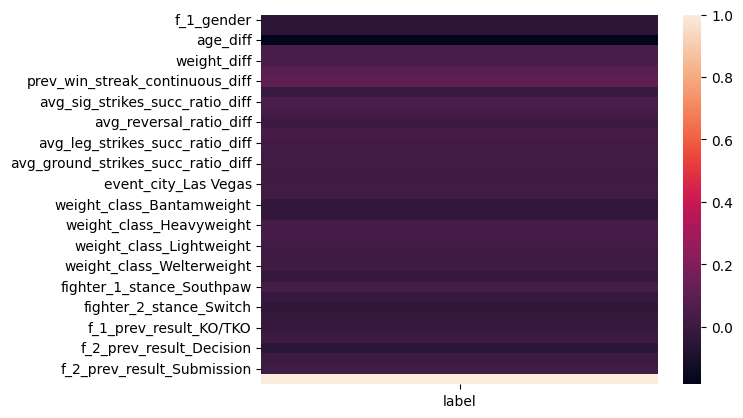

In [49]:
import matplotlib.pyplot as mp
import seaborn as sb
dataplot = sb.heatmap(dfcorr.corr(numeric_only=True)[['label']])
mp.show()

In [53]:
dfcorr.corr(numeric_only=True)[['label']]

,label
f_1_gender,-0.048068
f_2_gender,-0.048068
age_diff,-0.184601
height_diff,0.045370
weight_diff,0.045654
win_ratio_diff,0.089255
prev_win_streak_continuous_diff,0.108969
prev_loss_streak_continuous_diff,-0.006984
avg_sig_strikes_succ_ratio_diff,0.047223
avg_submission_ratio_diff,0.032874


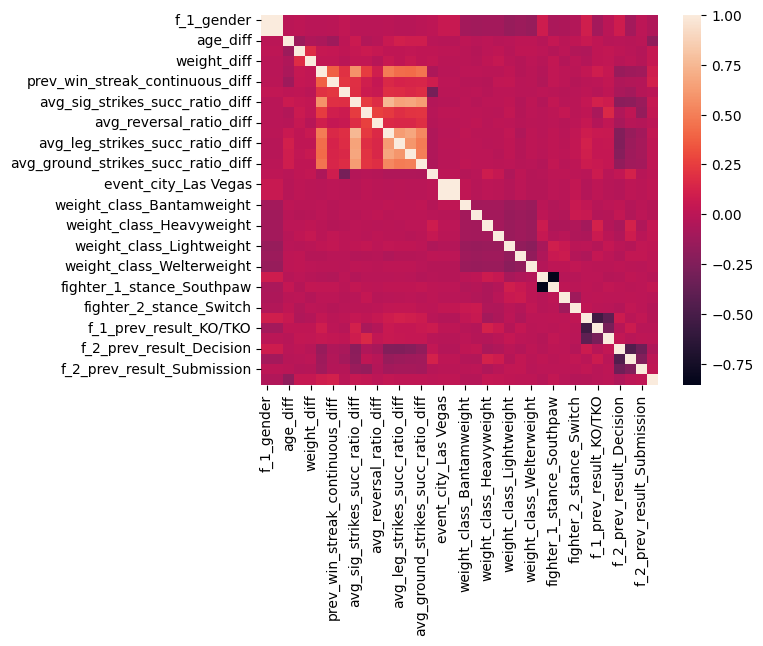

In [50]:
dataplot = sb.heatmap(dfcorr.corr(numeric_only=True))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

random_seed = 76

X_train, X_test, y_train, y_test = train_test_split(df_feature, df_label, test_size=0.5, random_state=random_seed)
classifier = RandomForestClassifier(n_estimators=50, random_state=random_seed)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=76)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.24      0.33      1347
           1       0.67      0.86      0.76      2413

    accuracy                           0.64      3760
   macro avg       0.59      0.55      0.54      3760
weighted avg       0.61      0.64      0.60      3760



In [29]:
X_test.isnull().values.any()


False

In [30]:
import eli5
from eli5.sklearn import PermutationImportance

permutation = PermutationImportance(classifier, random_state=random_seed).fit(X_test, y_test)
eli5.show_weights(permutation, feature_names=X_test.columns.tolist())

Weight,Feature
0.0241 ± 0.0107,age_diff
0.0057 ± 0.0049,prev_win_streak_continuous_diff
0.0037 ± 0.0069,avg_leg_strikes_succ_ratio_diff
0.0036 ± 0.0018,fighter_2_stance_Switch
0.0036 ± 0.0030,weight_class_Welterweight
0.0032 ± 0.0054,prev_loss_streak_continuous_diff
0.0029 ± 0.0059,avg_clinch_strikes_succ_ratio_diff
0.0027 ± 0.0039,event_state_Nevada
0.0025 ± 0.0044,avg_reversal_ratio_diff
0.0022 ± 0.0070,avg_ground_strikes_succ_ratio_diff


In [31]:
kk = eli5.explain_weights(permutation, feature_names=X_test.columns.tolist(),top = None)

In [32]:
kk

Weight,Feature
0.0241 ± 0.0107,age_diff
0.0057 ± 0.0049,prev_win_streak_continuous_diff
0.0037 ± 0.0069,avg_leg_strikes_succ_ratio_diff
0.0036 ± 0.0018,fighter_2_stance_Switch
0.0036 ± 0.0030,weight_class_Welterweight
0.0032 ± 0.0054,prev_loss_streak_continuous_diff
0.0029 ± 0.0059,avg_clinch_strikes_succ_ratio_diff
0.0027 ± 0.0039,event_state_Nevada
0.0025 ± 0.0044,avg_reversal_ratio_diff
0.0022 ± 0.0070,avg_ground_strikes_succ_ratio_diff
